<a href="https://colab.research.google.com/github/jianyangma/autodiff/blob/main/autodiff_puzzlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autodiff Puzzles
- by [Sasha Rush](http://rush-nlp.com) - [srush_nlp](https://twitter.com/srush_nlp)


This notebook contains a series of self-contained puzzles for learning about derivatives in tensor libraries. It is the 3rd puzzle set in a series of puzzles about deep learning programming ([Tensor Puzzles](https://github.com/srush/Tensor-Puzzles), [GPU Puzzles](https://github.com/srush/GPU-Puzzles) ) . While related in spirit, the puzzles are all pretty seperate and can be done on their own.


![](https://github.com/srush/autodiff-puzzles/raw/main/image.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/srush/Autodiff-Puzzles/blob/main/autodiff_puzzlers.ipynb)



## Introduction

Deep learning libraries like PyTorch utilize autodifferentiation of tensors to compute the parameter updates necessary to learn complex models from data. This technique is central to understanding why deep learning has become so widely used and effective. The autodifferentiation process is a neat trick that builds up a computational graph and then uses that graph to provide derivatives for user-constructed mathematical functions. At heart, this process is just an instantiation of the chain-rule based on implementations of every function and its derivative.

However, a library *needs* to have efficient implementations of derivatives for its key building blocks. This sounds trivial -> just implement high school calculus. However, this is a bit more tricky than it sounds. Tensor-to-tensor functions are pretty complex and require keeping careful track of indexing on both the input and the output side.

Your goal in these puzzles is to implement the derivatives for each function below. In each case the function takes in a tensor x and returns a tensor f(x), so your job is to compute $\frac{d f(x)_o}{dx_i}$ for all indices $o$ and $i$. If you get discouraged, just remember, you did this in high school (it just had way less indexing).

## Rules and Tips

* Every answer is 1 line of 80-column code.
* Everything in these puzzles should be done with standard Python numbers. (There is **no** need for torch.)
* Recall the basic multivariate calculus identities, most importantly:
$$f(x_1, x_2, x_3) = x_1 + x_2 + x_3 \Rightarrow \frac{d f(x)_1}{dx_1} = 1, \frac{d f(x)_1}{dx_2} = 0$$

* Python booleans auto-cast with python numbers. So you can use them as indicator functions, i.e. $$\mathbf{1}(3=3) \cdot (25-3)$$


In [1]:
(3 == 3) * (25 - 3)

22

In [2]:
# Library code - SKIP ME
!pip install -qqq git+https://github.com/chalk-diagrams/chalk@tag2
!wget -q https://github.com/srush/Autodiff-Puzzles/raw/main/lib.py

import torch
import sys

sys.setrecursionlimit(10000)
from lib import *

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 67 kB 3.0 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 


For each of the problems, a function $f$ is provided. Your job is to compute the derivative $\frac{df(x)_o} {dx_i}$. With these simple derivatives we can apply the chain rule to compute complex updates to models.

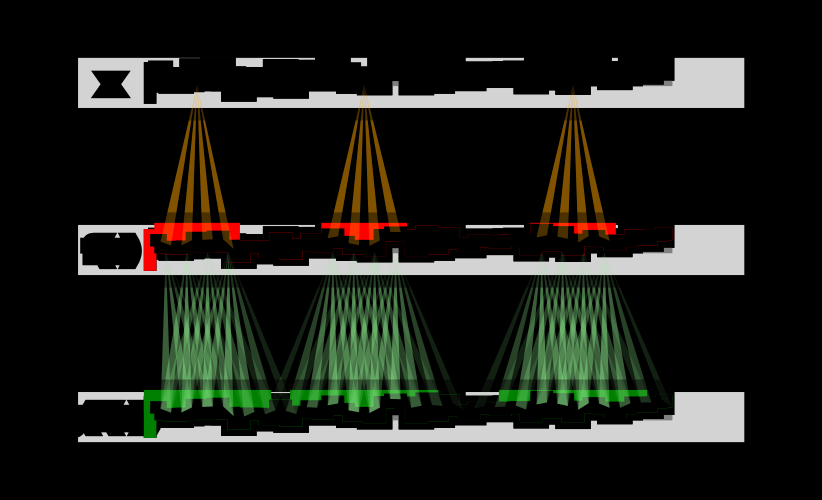

In [3]:
in_out2(fb_demo, fb_demo, overlap=False, out_shape=50, y=gy, pos=[4, 20, 40])

You will do this by filling in the function for the `dx` variable. If you get any of the derivatives wrong, it will print out the values of $o$ and $i$ that you need to fix. Correct derivatives will be shown in orange and green, whereas incorrect (non-zero) derivatives will show up as red. The target differential is shown as a light grey on the graphic.

### Problem 1: Id

Warmup: $f(x_1) = x_1$

Passed Tests!


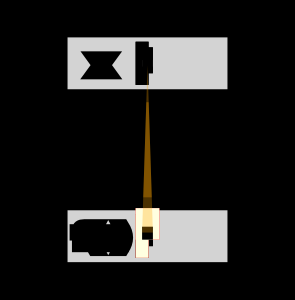

In [4]:
def fb_id(x):
    f = lambda o: x[0]
    dx = lambda i, o: 1 if i == 0 else 0
    return f, dx


in_out(fb_id, overlap=False, y=gy[1:2], out_shape=1)

### Problem 2: Cosine

Warmup: $f(x_1) = \cos(x_1)$

Passed Tests!


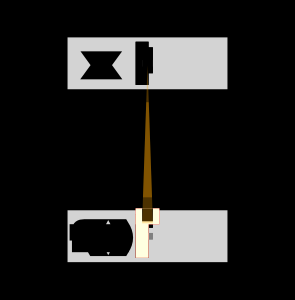

In [5]:
def fb_cos(x):
    f = lambda o: math.cos(x[0])
    dx = lambda i, o: -1 * math.sin(x[0]) if i == 0 else 0
    return f, dx


in_out(fb_cos, overlap=False, y=gy[1:2], out_shape=1)

### Problem 3: Mean

$f(x_1, x_2, \ldots, x_N) = (x_1 + x_2 + \ldots + x_N) / N$

Passed Tests!


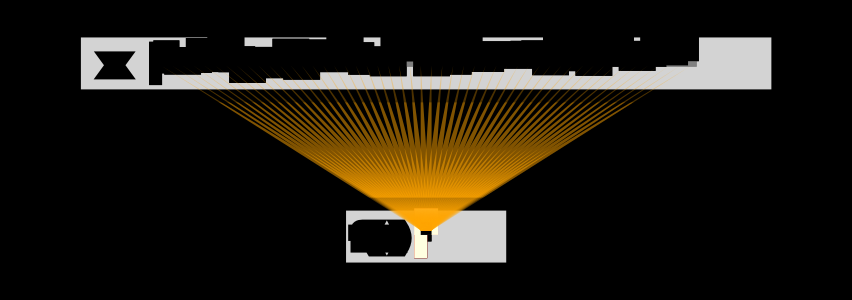

In [6]:
def fb_mean(x):
    N = x.shape[0]
    f = lambda o: sum(x[i] for i in range(N)) / N
    dx = lambda i, o: 1 / N
    return f, dx


in_out(fb_mean, overlap=False, out_shape=1)

### Problem 4: Product

$f(x_1, x_2, \ldots, x_N) = x_1  x_2  \ldots  x_N$

Passed Tests!


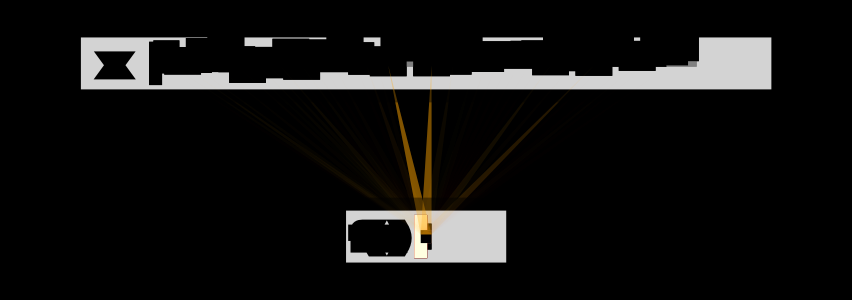

In [7]:
def fb_prod(x):
    pr = torch.prod(x)
    f = lambda o: pr
    dx = lambda i, o: pr / x[i]
    return f, dx


in_out(fb_prod, overlap=False, out_shape=1)

### Problem 5: Repeat

$f(x_1) = [x_1, x_1,  x_1, \ldots  x_1]$

Hint: The function `dx` should return a scalar. It is the
derivative of $f(x_1)_o$, i.e. the o'th output. 


Passed Tests!


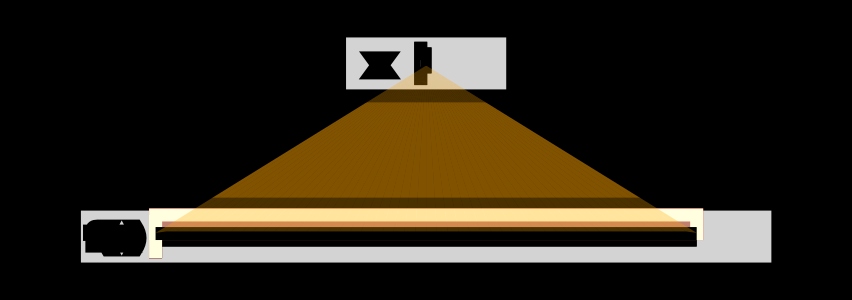

In [8]:
def fb_repeat(x):
    f = lambda o: x[0]
    dx = lambda i, o: 1 if i == 0 else 0
    return f, dx


in_out(fb_repeat, overlap=False, y=gy[1:2], out_shape=50)

### Problem 6: Repeat and Scale

$$f(x_1) = [x_1 * 1/N, x_1 * 2/N,  x_1 * 3/N,  \ldots  x_N * N/N]$$

Passed Tests!


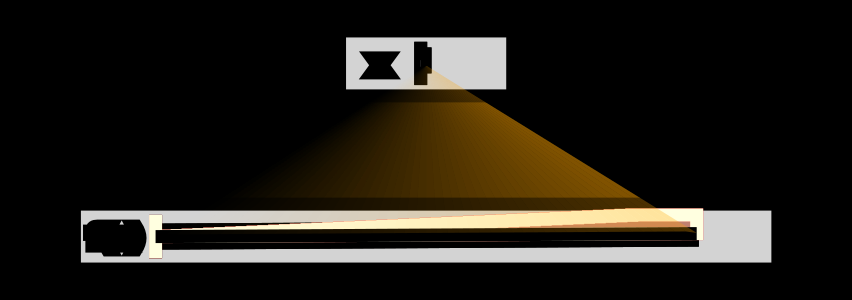

In [9]:
def fb_repeat_scale(x):
    N = 50
    f = lambda o: x[0] * (o / N)
    dx = lambda i, o: o / N if i == 0 else 0
    return f, dx


in_out(fb_repeat_scale, overlap=False, y=gy[1:2], out_shape=50)

## Problem 7: Negation

$$f(x_1, x_2, \ldots) = [-x_1, -x_2, \ldots]$$

(Hint: remember the indicator trick, i.e.

```python
(a == b) * 27 # 27 if a == b else 0
```

Passed Tests!


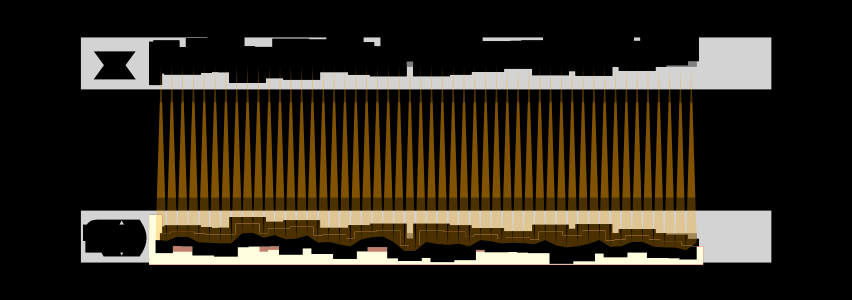

In [10]:
def fb_neg(x):
    f = lambda o: -x[o]
    dx = lambda i, o: -1 if i == o else 0
    return f, dx


in_out(fb_neg)

### Problem 8: ReLU

$$f(x_1, x_2, \ldots) = [\text{relu}(x_1), \text{relu}(x_2), \ldots]$$

Recall

$$
\text{relu}(x) = \begin{cases}
0 & x < 0 \\
x & x >= 0
\end{cases}
$$

(Note: you can ignore the not of non-differentiability at 0.)

Passed Tests!


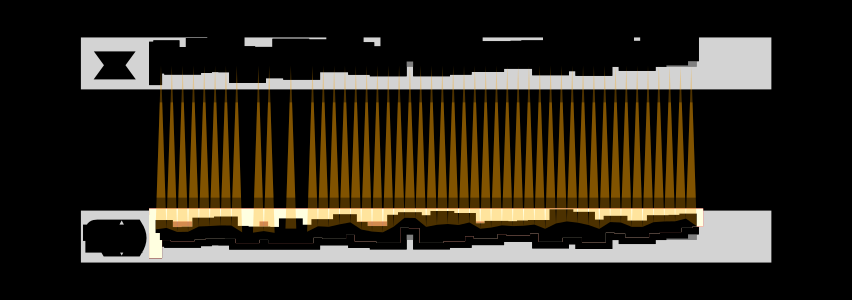

In [11]:
def fb_relu(x):
    f = lambda o: (x[o] > 0) * x[o]
    dx = lambda i, o: (x[o] > 0) * 1 if i == o else 0
    return f, dx


in_out(fb_relu)

### Problem 9: Index

$$f(x_1, x_2, \ldots, x_{25}) = [x_{10}, x_{11}, \ldots, x_{25}]$$



Passed Tests!


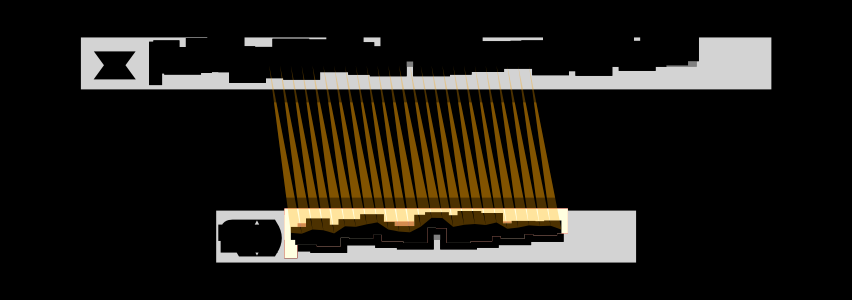

In [12]:
def fb_index(x):
    f = lambda o: x[o + 10]
    dx = lambda i, o: 1 if i == o + 10 else 0
    return f, dx


in_out(fb_index, overlap=False, out_shape=25)

Note: for the next several problems the visualization changes and only shows the derivatives for some points $i$ for graphical simplicity.

### Problem 9: Cumsum

$$f(x_1, x_2, \ldots) = [\sum^1_{i=1} x_{i}, \sum^2_{i=1} x_{i}, \sum^3_{i=1} x_{i}, \ldots, ] / 20$$



Passed Tests!


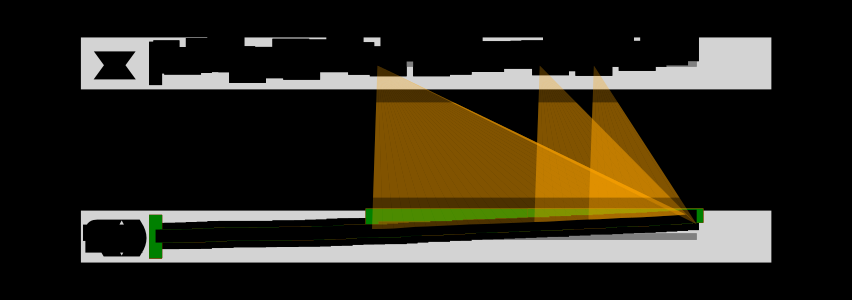

In [34]:
def fb_cumsum(x):
    out = torch.cumsum(x, 0)
    f = lambda o: out[o] / 20
    dx = lambda o, i: 1 / 20 if i >= o else 0
    return f, dx


in_out(fb_cumsum, [20, 35, 40], overlap=True, diff=20)

### Problem 10: Running Mean


$$f(x_1, x_2, \ldots)_o = \frac{\displaystyle \sum^o_{i=\max(o-W, 1)} x_i}{ W}$$

Passed Tests!


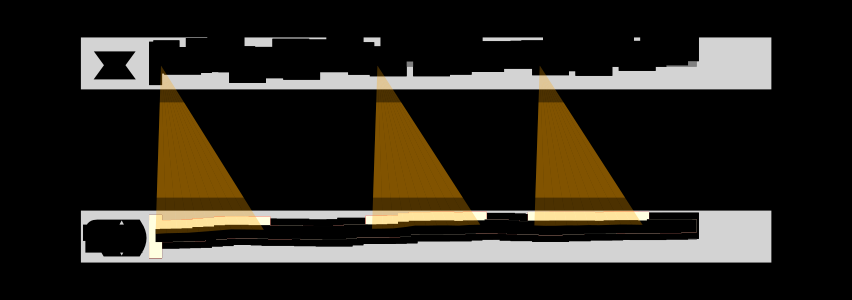

In [30]:
def fb_running(x):
    W = 10
    f = lambda o: sum([x[o - do] for do in range(W) if o - do >= 0]) / W
    dx = lambda i, o: 1 / W if i >= o - W + 1 and i <= o else 0
    return f, dx


in_out(fb_running, [0, 20, 35], diff=4)

### Problem 11: Sort


$$f(x_1, x_2, \ldots) = \text{x's in sorted order}$$

(This one is a bit counterintuitive! Note that we are not asking you to differentiate the sorting function it self.)

Passed Tests!


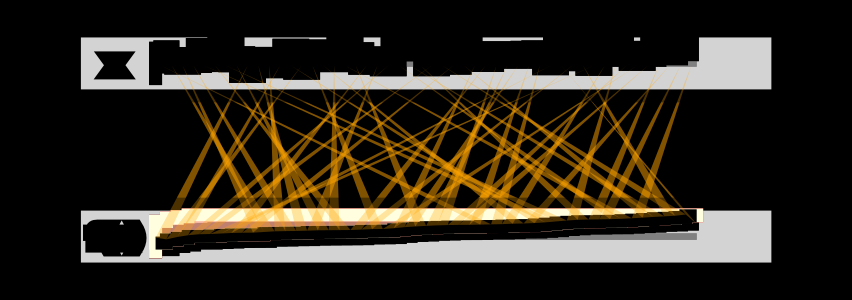

In [31]:
def fb_sort(x):
    sort, argsort = torch.sort(x, 0)
    f = lambda o: sort[o]
    dx = lambda i, o: 1 if i == argsort[o] else 0
    return f, dx


in_out(fb_sort, overlap=False)

Next we move on to functions of two arguments. For these you will produce two derivatives: $$\frac{df(x, y)_o}{x_i}, \frac{df(x, y)_o}{y_j}$$. Everything else is the same.

### Problem 12: Elementwise mean

$$f(x, y)_o = (x_o + y_o) /2 $$

Passed Tests!


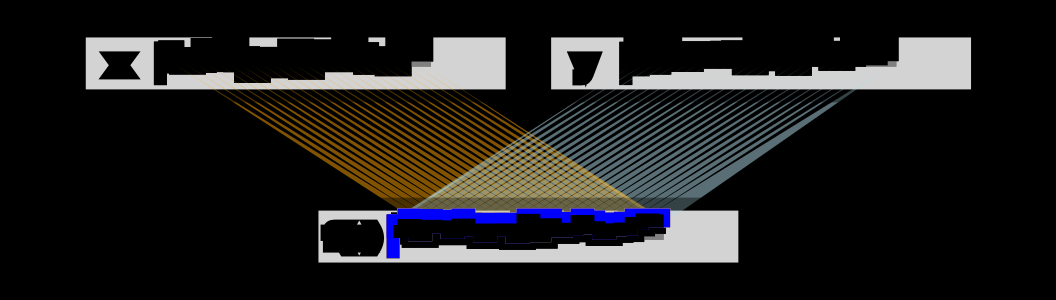

In [17]:
def fb_emean(x, y):
    f = lambda o: (x[o] + y[o]) / 2
    dx = lambda i, o: 1 / 2 if i == o else 0
    dy = lambda j, o: 1 / 2 if j == o else 0
    return f, dx, dy


zip(fb_emean)

### Problem 13: Elementwise mul

$$f(x, y)_o = x_o * y_o $$

Passed Tests!


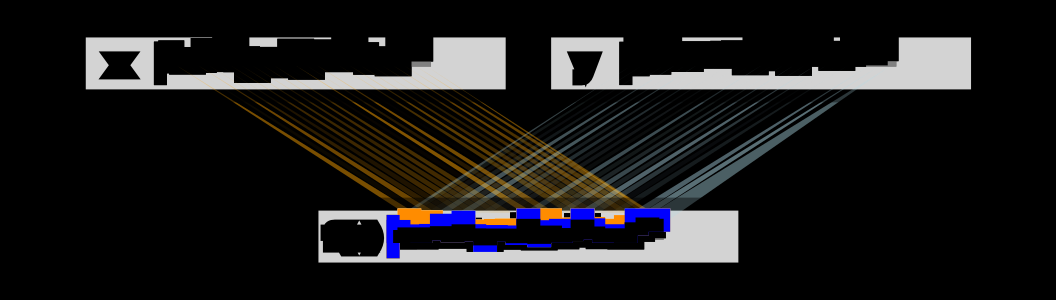

In [18]:
def fb_mul(x, y):
    f = lambda o: x[o] * y[o]
    dx = lambda i, o: y[o] if i == o else 0
    dy = lambda j, o: x[o] if j == o else 0
    return f, dx, dy


zip(fb_mul)

### Problem 14: 1D Convolution

This is the standard 1D convolution used in deep learning. There is no wrap-around.

$$f(x, y)_o = \sum_{j=1}^K x_{o+j} * y_{j} / K $$

Note: This is probably the hardest one. The answer is short but tricky.

Passed Tests!


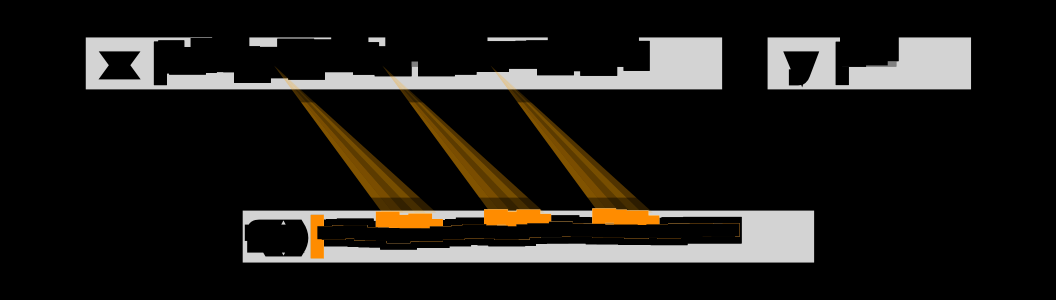

In [19]:
def fb_conv(x, y):
    W = 5
    f = lambda o: sum((x[o + j] * y[j]) / W for j in range(W))
    dx = lambda i, o: y[i - o] / W if i >= o and i < o + W else 0
    dy = lambda j, o: x[j + o] / W if j + o >= 0 and j + o < len(x) else 0
    return f, dx, dy


SHOW_KERNEL = False
zip(
    fb_conv,
    split=45,
    out_shape=39,
    pos1=[10, 20, 30],
    pos2=[5] if SHOW_KERNEL else [],
    diff=5,
    overlap=True,
)

For these next problems, the input is a matrix and an optional vector, and the output is a matrix.

$$\frac{df(x, y)_{o, p}}{x_{i, j}}, \frac{df(x, y)_{o,p}}{y_j}$$

For visual simplicity results are shown on the flattened version of these matrices.

## Problem 15: View

Compute the identity function for all $o,p$. $Y$ is ignored.

$$f(X, Y)_{o, p} = X_{o, p}$$

Passed Tests!


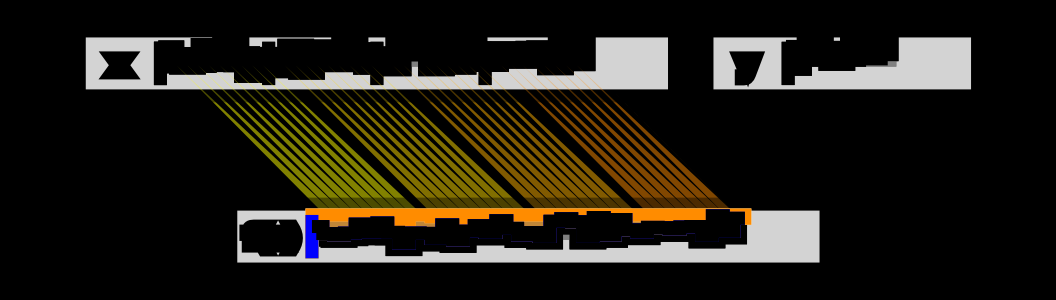

In [20]:
def fb_view(x, y):
    f = lambda o, p: x[o, p]
    dx = lambda i, j, o, p: 1 if i == o and j == p else 0
    dy = lambda j, o, p: 0
    return f, dx, dy


zip(
    make_mat(fb_view, (4, 10), (4, 10)),
    split=40,
    out_shape=40,
    gaps=[10 * i for i in range(4)],
)

### Problem 16: Transpose

Transpose row and columns

$$f(X, Y)_{o, p} = X_{p, o}$$


Passed Tests!


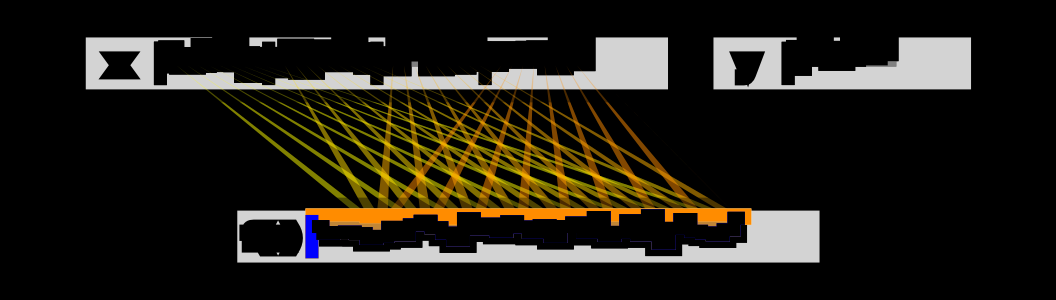

In [21]:
def fb_trans(x, y):
    f = lambda o, p: x[p, o]
    dx = lambda i, j, o, p: 1 if i == p and j == o else 0
    dy = lambda j, o, p: 0
    return f, dx, dy


zip(
    make_mat(fb_trans, in_shape=(4, 10), out_shape=(10, 4)),
    split=40,
    out_shape=40,
    gaps=[10 * i for i in range(4)],
)

### Problem 17: Broadcast

Broadcast a matrix with a vector

$$f(X, y)_{o, p} = X_{o, p} \cdot y_p$$

Passed Tests!


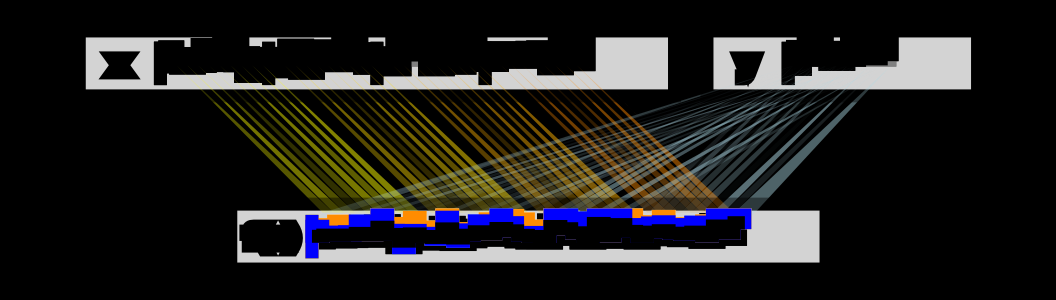

In [22]:
def fb_broad(x, y):
    f = lambda o, p: x[o, p] * y[p]
    dx = lambda i, j, o, p: y[p] if i == o and j == p else 0
    dy = lambda j, o, p: x[o, p] if j == p else 0
    return f, dx, dy


zip(
    make_mat(fb_broad, in_shape=(4, 10), out_shape=(4, 10)),
    split=40,
    out_shape=40,
    gaps=[10 * i for i in range(4)],
)

### Problem 18: Mean Reduce

Compute the mean over rows

$$f(X, y)_{o, p} = \sum_{i} X_{i, p} / R$$


Passed Tests!


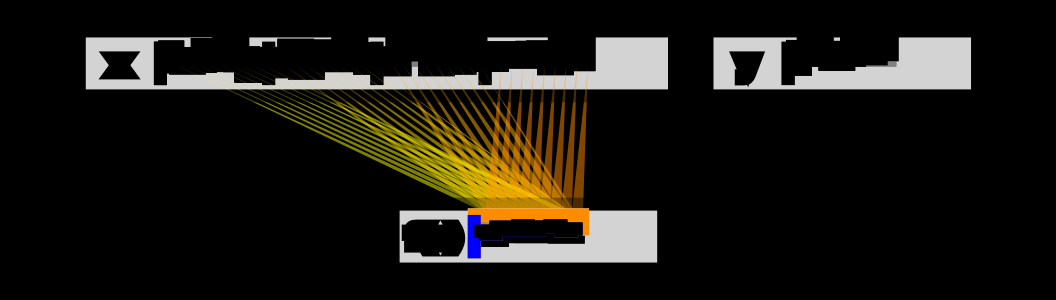

In [35]:
def fb_mean(x, y):
    R = x.shape[0]
    f = lambda o, p: sum(x[di, p] for di in range(R)) / R
    dx = lambda i, j, o, p: 1 / R if j == p else 0
    dy = lambda j, o, p: 0
    return f, dx, dy


zip(
    make_mat(fb_mean, in_shape=(4, 10), out_shape=(1, 10)),
    split=40,
    out_shape=10,
    gaps=[10 * i for i in range(4)],
)

### Problem 20: 2D Conv

Two Dimensional convolution

$$f(X, Y)_{o,p} = \sum_{dh}\sum_{dw} X_{o+dh, p+dw} Y_{dh,dw}$$



Passed Tests!


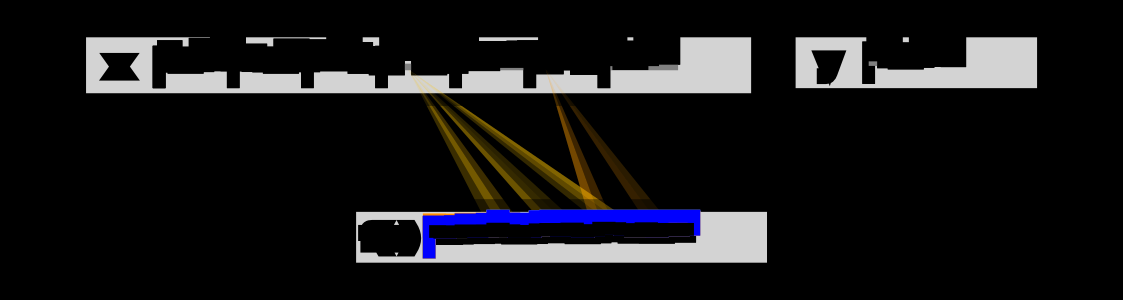

In [41]:
def fb_conv(x, y):
    kh, kw = y.shape
    f = lambda o, p: sum(
        x[o + di, p + dj] * y[di, dj] / (kh * kw)
        for di in range(kh)
        for dj in range(kw)
    )
    dx = lambda i, j, o, p: y[i - o, j - p] / (kh * kw) if i >= o and i - o < kh and j >= p and j - p < kw else 0
    dy = lambda i, j, o, p: x[o + i, p + j] / (kh * kw) if i < kh and j < kw else 0
    return f, dx, dy


zip(
    make_mat2(fb_conv, in_shape=(7, 7), in_shape2=(3, 3), out_shape=(5, 5)),
    split=49,
    out_shape=25,
    gaps=[7 * i for i in range(7)],
    y=torch.cat(2 * [gy.abs() + 0.2], 0)[:58],
    pos1=[23, 36],
    pos2=[],
)